# RCNN

In [7]:
# Import the necessary modules from the torchvision package
from torchvision import models

# Load a pre-trained Faster R-CNN model with a ResNet-50 backbone and FPN
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [8]:
coco_labels = {
    1: 'person',
    2: 'bicycle',
    3: 'car',
    4: 'motorcycle',
    5: 'airplane',
    6: 'bus',
    7: 'train',
    8: 'truck',
    9: 'boat',
    10: 'traffic light',
    11: 'fire hydrant',
    12: 'stop sign',
    13: 'parking meter',
    14: 'bench',
    15: 'bird',
    16: 'cat',
    17: 'dog',
    18: 'horse',
    19: 'sheep',
    20: 'cow',
    21: 'elephant',
    22: 'bear',
    23: 'zebra',
    24: 'giraffe',
    25: 'backpack',
    26: 'umbrella',
    27: 'handbag',
    28: 'tie',
    29: 'suitcase',
    30: 'frisbee',
    31: 'skis',
    32: 'snowboard',
    33: 'sports ball',
    34: 'kite',
    35: 'baseball bat',
    36: 'baseball glove',
    37: 'skateboard',
    38: 'surfboard',
    39: 'tennis racket',
    40: 'bottle',
    41: 'wine glass',
    42: 'cup',
    43: 'fork',
    44: 'knife',
    45: 'spoon',
    46: 'bowl',
     47: 'banana',
    48: 'apple',
    49: 'sandwich',
    50: 'orange',
    51: 'broccoli',
    52: 'carrot',
    53: 'hot dog',
    54: 'pizza',
    55: 'donut',
    56: 'cake',
    57: 'chair',
    58: 'couch',
    59: 'potted plant',
    60: 'bed',
    61: 'dining table',
    62: 'toilet',
    63: 'tv',
    64: 'laptop',
    65: 'mouse',
    66: 'remote',
    67: 'keyboard',
    68: 'cell phone',
    69: 'microwave',
    70: 'oven',
    71: 'toaster',
    72: 'sink',
    73: 'refrigerator',
    74: 'book',
    75: 'clock',
    76: 'vase',
    77: 'scissors',
    78: 'teddy bear',
    79: 'hair drier',
    80: 'toothbrush'
}

In [9]:
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageDraw, ImageFont
import os

# Define the transformation to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Set input and output directories for images
in_directory = 'images'
out_directory = 'detected images RCNN'

# Loop through all image files in the input directory
for filename in os.listdir(in_directory):
    # Load the image
    image = Image.open(os.path.join(in_directory,filename))
    tensor_image = transform(image)

    # Make predictions on the image
    model.eval()
    with torch.no_grad():
        predictions = model([tensor_image])

    # Get the bounding boxes and labels
    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()

    # Map the predicted label numbers to class names
    label_names = [coco_labels[label] if label < 81 else 'Unknown' for label in labels]
    # In the COCO dataset, there are 80 labels for different objects.
    # Any label number greater than 80 is considered as 'Unknown'.

    # Draw the bounding boxes on the image and label with names
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 10)
    for box, label_name in zip(boxes, label_names):
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=2)
        draw.text((box[0], box[1]), label_name, fill='green', font=font, stroke_width=2, stroke_fill='black')
        # Draw a rectangle around each object and label it with the predicted class name.

    # Save the image with bounding boxes and label names
    image.save(os.path.join(out_directory,filename))
    print(f'{filename} Done!')
    # Save the image in the output directory and print a message indicating the completion of the process.

Bowriding-01b5de5b-6aa9-475d-b74a-323017b8df8c.jpg Done!


KeyboardInterrupt: 

This code is an object detection script that uses a pre-trained Faster R-CNN model from torchvision to detect objects in images. The script takes a directory containing images as input, detects objects in each image, draws bounding boxes around the detected objects, and saves the modified images in a specified output directory. Here's a brief explanation of the code:

- First, the necessary libraries are imported: `torch`, `torchvision.transforms`, `PIL.Image`, `PIL.ImageDraw`, `PIL.ImageFont`, and `os`.
- Then, a `transforms.Compose` object is defined that converts the input image to a tensor.
- The input and output directories for the images are set using `in_directory` and `out_directory` variables.
- A `for` loop is used to iterate over all the files in the input directory. In each iteration:
    - The image file is opened using `PIL.Image.open()` and converted to a tensor using the `transform` defined earlier.
    - The model is set to evaluation mode using `model.eval()`.
    - The image tensor is fed to the model, which returns a list of predictions containing the bounding box coordinates and predicted class labels for all objects detected in the image.
    - The labels are mapped to their corresponding class names using the `coco_labels` dictionary.
    - The script draws a rectangle around each detected object and labels it with the predicted class name using `PIL.ImageDraw.Draw()`.
    - The modified image is saved in the output directory using `PIL.Image.save()`.
    - A completion message is printed indicating that the processing for the current image is done.

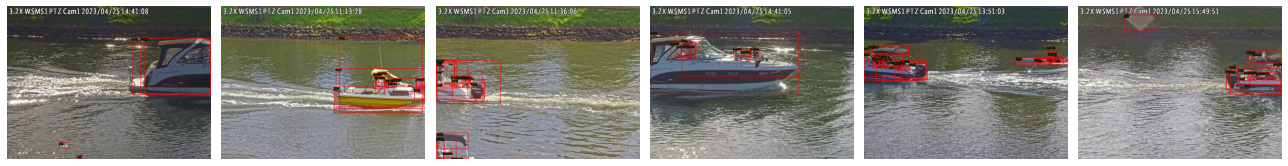

In [5]:
import matplotlib.pyplot as plt

# Load some example images
import numpy as np
from PIL import Image

image_paths = [os.path.join(out_directory,filename) for filename in os.listdir(out_directory)]
images = [np.array(Image.open(p)) for p in image_paths[:6]]

def plot_images(images, rows=1, cols=len(images)):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Plot the images
plot_images(images)

# YOLOV5

In [10]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5
!pip install -r requirements.txt  # install
!pip install yolo5

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [11]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\LAPTOP WORLD/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-3 Python-3.9.4 torch-2.0.0+cpu CPU

Fusing layers... 


requirements: C:\Users\LAPTOP WORLD\.cache\torch\hub\requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model.train()

This code loads the YOLOv5s model from the `ultralytics/yolov5` repository using PyTorch Hub. YOLOv5 is a state-of-the-art object detection model that can detect various objects in images and videos in real-time. `torch.hub.load()` is a PyTorch utility function that allows users to easily load pre-trained models from various repositories. 

The first argument to `torch.hub.load()` is the name of the repository and the second argument is the name of the model to load. In this case, the repository name is `ultralytics/yolov5` and the model name is `yolov5s`. The `yolov5s` model is the smallest variant of the YOLOv5 models, which has fewer parameters and is faster than larger variants. 

After loading the model, it is stored in the `model` variable, which can be used to make predictions on images or videos.

In [12]:

in_directory = 'images'

for filename in os.listdir(in_directory):
    # Load the image
    image = Image.open(os.path.join(in_directory,filename))

    predictions = model([image])

    # Results
    predictions.print()  
    predictions.save()  # or .show()
    # you'll find the results in \runs\detect path

image 1/1: 600x800 1 boat
Speed: 22.8ms pre-process, 296.3ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp251
image 1/1: 600x800 3 persons, 1 boat
Speed: 15.8ms pre-process, 249.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp252
image 1/1: 600x800 5 persons, 3 boats
Speed: 14.5ms pre-process, 247.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp253
image 1/1: 600x800 3 persons, 1 boat
Speed: 11.5ms pre-process, 251.2ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp254
image 1/1: 600x800 4 persons, 3 boats
Speed: 12.0ms pre-process, 248.2ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp255
image 1/1: 600x800 3 persons, 3 boats, 1 surfboard
Speed: 11.0ms pre-process, 249.4ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs\detect\exp256
image

KeyboardInterrupt: 

The code reads images from the directory named 'images' using `os.listdir()` function to get the list of filenames in that directory. Then, for each filename, it loads the corresponding image using `Image.open()` function and stores it in the `image` variable. 

Next, it calls the `model` to make predictions on the image by passing the `image` as input to the model. The results are stored in the `predictions` variable.

Finally, it prints the predictions using the `print()` method of the `predictions` object. It also saves the results using the `save()` method of the `predictions` object. Alternatively, it can display the results using the `show()` method of the `predictions` object. The results will be saved in the `\runs\detect` path.

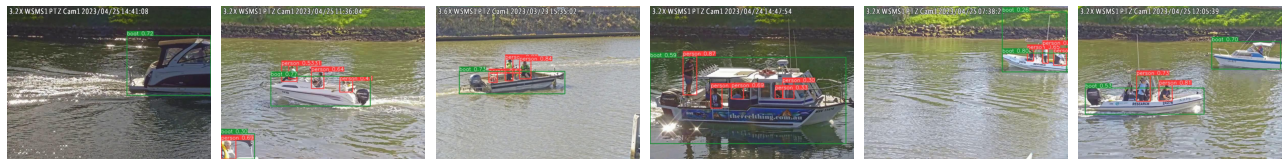

In [10]:
image_paths = []
for fp in os.listdir('runs\detect'):
    for filename in os.listdir(os.path.join('runs\detect',fp)):
        image_paths.append(os.path.join('runs\detect',fp,filename))
images = [np.array(Image.open(p)) for p in image_paths[:6]]

# Plot the images
plot_images(images)